In [1]:
import numpy as np
import cv2
import PIL.Image as Image
from IPython.display import display
import math

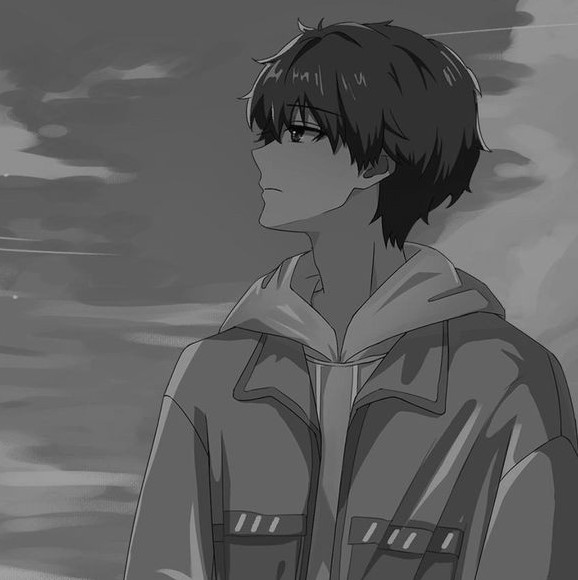

In [15]:
img = cv2.imread("xau.jpg")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
display(Image.fromarray(img_gray))

Gaussian

In [3]:
filter = np.array([(math.pow(math.exp(1),-1)/4.8976,math.pow(math.exp(1),-0.5)/4.8976,math.pow(math.exp(1),-1)/4.8976),
                   (math.pow(math.exp(1),-0.5)/4.8976,1/4.8976,math.pow(math.exp(1),-0.5)/4.8976),
                   (math.pow(math.exp(1),-1)/4.8976,math.pow(math.exp(1),-0.5)/4.8976,math.pow(math.exp(1),-1)/4.8976)])

In [12]:
new_arr =np.zeros((img_gray.shape[0] + filter.shape[0] - 1,img_gray.shape[1] + filter.shape[1] - 1))
for i in range(img_gray.shape[0]):
    for j in range(img_gray.shape[1]):
      new_arr[i + int((filter.shape[0]-1)/2), j + int((filter.shape[1]-1)/2)] = img_gray[i,j]
row = new_arr.shape[0]
col = new_arr.shape[1]
new_arr[0:row,0:1] = new_arr[0:row,1:2]
new_arr[0:row,col-1:col] = new_arr[0:row,col-2:col-1]
new_arr[0:1,0:col] = new_arr[1:2,0:col]
new_arr[row-1:row,0:col] = new_arr[row-2:row-1,0:col]

In [11]:
for i in range(img_gray.shape[0]):
    for j in range(img_gray.shape[1]):
      temp = new_arr[i:i+filter.shape[0],j:j+filter.shape[1]]
      res = np.sum(temp*filter)
      img_gray[i,j] = round(res,0)

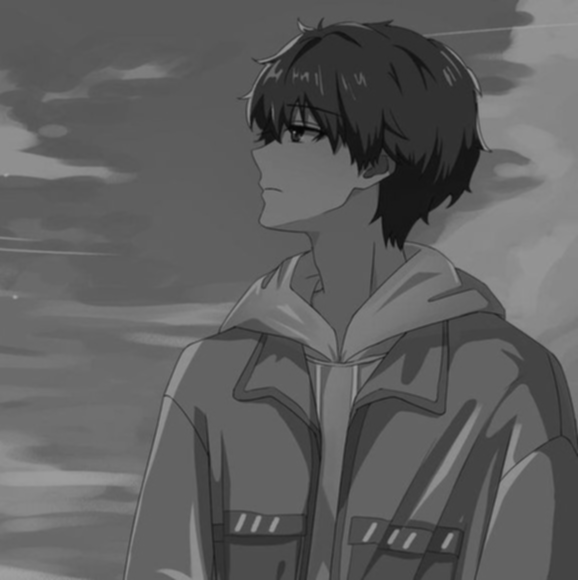

In [8]:
display(Image.fromarray(img_gray))

Laplace, Sobel

In [13]:
filter_x = np.array([(-1,-2,-1),(0,0,0),(1,2,1)])
filter_y = np.array([(-1,0,1),(-2,0,2),(-1,0,1)])
arr_sobel = np.array(img_gray)
for i in range(img_gray.shape[0]):
    for j in range(img_gray.shape[1]):
      temp = new_arr[i:i+filter.shape[0],j:j+filter.shape[1]]
      res_x = np.sum(temp*filter_x)
      res_y = np.sum(temp*filter_y)
      value = res_x + res_y
      if value < 0 :
        arr_sobel[i,j] = 0
      else:
        arr_sobel[i,j] = round(value,0)
arr_sobel

array([[ 0,  0,  0, ..., 14,  8,  0],
       [ 0,  0,  0, ..., 14,  6,  0],
       [ 0,  0,  0, ..., 12,  6,  4],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 4,  6,  0, ...,  0,  0,  0]], dtype=uint8)

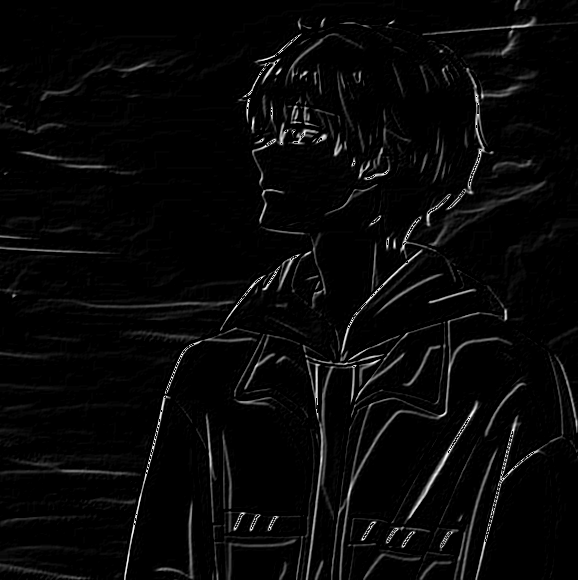

In [14]:
display(Image.fromarray(arr_sobel))

Laplacian of Gaussian (LoG)